In [4]:
# import the modules
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score , f1_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [5]:
# Code starts here
train = pd.read_csv(r"/Users/rahulkosamkar/Documents/Data_Science/Projects/car_insurance_claim_Machine_learning/train.csv")

# drop serial number
train.drop(columns=['ID'],inplace=True)
print(train.head())


print(train.corr())
# Code ends here

   Unnamed: 0  KIDSDRIV   AGE  HOMEKIDS   YOJ   INCOME PARENT1  HOME_VAL  \
0        3678         1  42.0         3   9.0   $4,701      No        $0   
1        2533         0  50.0         0   7.0  $10,232      No  $129,979   
2        9169         0  40.0         2  17.0  $66,200     Yes  $223,960   
3        4174         2  38.0         2  13.0  $34,056      No  $122,908   
4       10150         0  38.0         0   NaN  $45,734      No  $222,653   

  MSTATUS GENDER  ... TIF    CAR_TYPE  RED_CAR OLDCLAIM CLM_FREQ  REVOKED  \
0     Yes    z_F  ...   1  Sports Car       no       $0        0       No   
1     Yes    z_F  ...  16     Minivan       no   $5,458        2       No   
2    z_No    z_F  ...  13       z_SUV       no       $0        0       No   
3     Yes    z_F  ...   4  Sports Car       no     $502        1       No   
4     Yes      M  ...   1      Pickup       no   $3,296        1       No   

  MVR_PTS CLM_AMT CAR_AGE  CLAIM_FLAG  
0       4      $0     9.0           1  


### Clean and visualize the data

- Remove the `$` and `,` sign from all the columns.
- Visualize the distribution of the target variable.
- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

0    5414
1    2827
Name: CLAIM_FLAG, dtype: int64


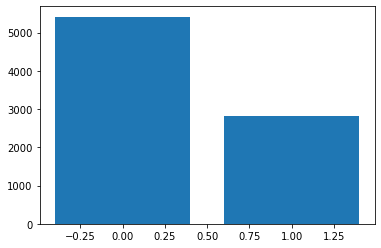

            total_missing  perc_missing
Unnamed: 0              0      0.000000
KIDSDRIV                0      0.000000
AGE                     6      0.083206
HOMEKIDS                0      0.000000
YOJ                   442      6.129524
INCOME                462      6.406878
PARENT1                 0      0.000000
HOME_VAL              458      6.351408
MSTATUS                 0      0.000000
GENDER                  0      0.000000
EDUCATION               0      0.000000
OCCUPATION            530      7.349882
TRAVTIME                0      0.000000
CAR_USE                 0      0.000000
BLUEBOOK                0      0.000000
TIF                     0      0.000000
CAR_TYPE                0      0.000000
RED_CAR                 0      0.000000
OLDCLAIM                0      0.000000
CLM_FREQ                0      0.000000
REVOKED                 0      0.000000
MVR_PTS                 0      0.000000
CLM_AMT                 0      0.000000
CAR_AGE               515      7.141867


In [6]:
# Code starts here

# Check the distribution of the target variable

#Storing value counts of target variable in 'claim_flag'
claim_flag = train['CLAIM_FLAG'].value_counts()
print(claim_flag)

#Plotting bar plot
plt.bar(claim_flag.index, claim_flag)
plt.show()

# replace the '$' and ',' symbol
columns = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']

for col in columns:
    train[col].replace({'\$': '', ',': ''}, regex=True,inplace=True)
    
# Convert object type to float on train
train[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']]=train[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']].astype(float)

# check missing values in train
print(pd.DataFrame({'total_missing': train.isnull().sum(), 'perc_missing': (train.isnull().sum()/7211)*100}))


In [7]:
# drop missing values
train.dropna(subset=['YOJ','OCCUPATION'],inplace=True)

# Split the data into train and test
X = train.drop(columns = ['CLAIM_FLAG'])
y = train[['CLAIM_FLAG']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
print(y_train['CLAIM_FLAG'].value_counts())
print(y_test['CLAIM_FLAG'].value_counts())
X_train_copy = X_train.copy()
#y_train=y_train[X_train.index]
#y_test=y_test[X_test.index]

# fill missing values with mean
X_train['AGE'].fillna((X_train['AGE'].mean()), inplace=True)
X_train['CAR_AGE'].fillna((X_train['CAR_AGE'].mean()), inplace=True)
X_train['INCOME'].fillna((X_train['INCOME'].mean()), inplace=True)
X_train['HOME_VAL'].fillna((X_train['HOME_VAL'].mean()), inplace=True)

X_test['AGE'].fillna((X_train['AGE'].mean()), inplace=True)
X_test['CAR_AGE'].fillna((X_train['CAR_AGE'].mean()), inplace=True)
X_test['INCOME'].fillna((X_train['INCOME'].mean()), inplace=True)
X_test['HOME_VAL'].fillna((X_train['HOME_VAL'].mean()), inplace=True)

# print(train.isnull().sum())



0    3339
1    1766
Name: CLAIM_FLAG, dtype: int64
0    1444
1     744
Name: CLAIM_FLAG, dtype: int64


### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [8]:
# Code Starts here

# Convert the categorical values to numeric value
columns = ["PARENT1","MSTATUS","GENDER","EDUCATION","OCCUPATION","CAR_USE","CAR_TYPE","RED_CAR","REVOKED"]

for col in columns:
    # Instantiate label encoder
    le = LabelEncoder()
    # fit and transform label encoder on train
    X_train[col]=le.fit_transform(X_train[col].astype(str))
    # transform label encoder on X_test
    X_test[col]=le.transform(X_test[col].astype(str))



# X_train.drop(columns = ['CLM_FREQ'], inplace = True)
# X_test.drop(columns = ['CLM_FREQ'], inplace = True)
print(X_train.corr())
    
    # Instantiate logistic regression
model = LogisticRegression(random_state = 6)

# fit the model
model.fit(X_train,y_train)

# predict the result
y_pred =model.predict(X_test)

# calculate the f1 score
score = accuracy_score(y_test, y_pred)
print(score)

print(confusion_matrix(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))



            Unnamed: 0  KIDSDRIV       AGE  HOMEKIDS       YOJ    INCOME  \
Unnamed: 0    1.000000  0.001391  0.021084 -0.006397  0.008147  0.008071   
KIDSDRIV      0.001391  1.000000 -0.080150  0.480723  0.043560 -0.031361   
AGE           0.021084 -0.080150  1.000000 -0.409191  0.116404  0.158185   
HOMEKIDS     -0.006397  0.480723 -0.409191  1.000000  0.090293 -0.144025   
YOJ           0.008147  0.043560  0.116404  0.090293  1.000000  0.289211   
INCOME        0.008071 -0.031361  0.158185 -0.144025  0.289211  1.000000   
PARENT1      -0.014891  0.203328 -0.298218  0.440183 -0.051798 -0.053278   
HOME_VAL      0.010924 -0.015861  0.200231 -0.100430  0.263301  0.578299   
MSTATUS      -0.004720 -0.044878 -0.097886 -0.051957 -0.147803  0.021701   
GENDER       -0.027904  0.017650 -0.055434  0.095676 -0.060085 -0.057050   
EDUCATION    -0.033867  0.014051  0.030672 -0.039424 -0.022484  0.007465   
OCCUPATION    0.033143  0.016397 -0.009866  0.003526  0.002612  0.063008   
TRAVTIME    

In [6]:
# Deal with Imbalanced Data

# Instantiate SMOTE 
smote = SMOTE(random_state=9)

# fit smote on training set
X_train, y_train = smote.fit_sample(X_train, y_train)

print(y_train['CLAIM_FLAG'].value_counts())
#print(y_test['CLAIM_FLAG'].value_counts())


# code ends here

# Instantiate a standardScaler
scaler = StandardScaler()

# Fit on training set only.
X_train = scaler.fit_transform(X_train)

# Apply transform to the test set.
X_test = scaler.transform(X_test)


# Instantiate logistic regression
model = LogisticRegression()

# fit the model
model.fit(X_train,y_train)

# predict the result
y_pred =model.predict(X_test)

# calculate the f1 score
score = accuracy_score(y_test, y_pred)
print(score)

print(confusion_matrix(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

1    3339
0    3339
Name: CLAIM_FLAG, dtype: int64
0.7673674588665448
[[1240  204]
 [ 305  439]]
0.5900537634408602
0.6827371695178849
0.6330209084354723


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [9]:
# Code Starts here
# Prediction on test data

# Read the test data
test = pd.read_csv(r'/Users/rahulkosamkar/Documents/Data_Science/Projects/car_insurance_claim_Machine_learning/test.csv')
print(test.shape)


# replace the '$' and ',' symbol
columns = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']

for col in columns:
    test[col].replace({'\$': '', ',': ''}, regex=True,inplace=True)

test[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']]=test[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']].astype(float)


test.dropna(subset=['YOJ','OCCUPATION'],inplace=True)
test['AGE'].fillna((X_train_copy['AGE'].mean()), inplace=True)
test['CAR_AGE'].fillna((X_train_copy['CAR_AGE'].mean()), inplace=True)
test['INCOME'].fillna((X_train_copy['INCOME'].mean()), inplace=True)
test['HOME_VAL'].fillna((X_train_copy['HOME_VAL'].mean()), inplace=True)

# Storing the id from the test file
id_ = test['ID']

# Apply the transformations on test
test.drop(columns=['ID'],inplace=True)


columns = ["PARENT1","MSTATUS","GENDER","EDUCATION","OCCUPATION","CAR_USE","CAR_TYPE","RED_CAR","REVOKED"]

for col in columns:
    # Instantiate label encoder
    le = LabelEncoder()
    # fit and transform label encoder on X_train
    le.fit(X_train_copy[col].astype(str))
    # transform label encoder on X_test
    test[col]=le.transform(test[col].astype(str))

    
    
# Predict on the test data
y_pred_test = model.predict(test)
y_pred_test = y_pred_test.flatten()

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'CLAIM_FLAG':y_pred_test})
print(sample_submission.head())

# Replacing the values of sample_submission
sample_submission.replace({1:'Yes', 0: 'No'},inplace=True)

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission_test.csv',index=False)

(2061, 25)
          Id  CLAIM_FLAG
0  968418547           1
3  475325469           0
4  837299054           0
6  206196303           1
7  818982675           0
